<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Interpola%C3%A7%C3%A3o_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Interpolação**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

#**A forma de Newton: interpolação polinomial**

No processo de interpolação polinomial, na forma de Newton, estamos interessados em encontrar um polinômio $$p_n(s)=f[x_0]+(s-x_0)f[x_0,x_1]+(s-x_0)(s-x_1)f[x_0,x_1,x_2]+\cdots+(s-x_0)(s-x_1)\cdots(s-x_{n-1})f[x_0,x_1,\ldots,x_n], $$ para o qual $$p_n(x_i)=y_i,$$ quando $x=(x_0,\,x_1,\,\ldots, x_{n})$ e $y=(y_1,\,y_2,\,\ldots,y_n)$ são vetores reais conhecidos.

Por isso, definimos as [diferenças divididas](https://en.wikipedia.org/wiki/Divided_differences) $$\begin{cases}f[x_i]&=&y_i\\\\
f[x_i,x_j]&=&\frac{f[x_i]-f[x_j]}{x_i-x_j}\\\\
f[x_0,x_1,\ldots,x_j]&=&\frac{f[x_0,x_1,\ldots,x_{j-1}]-f[x_1,x_2,\ldots,x_j]}{x_0-x_j}\end{cases}$$

**Obs:**

1. Note que $$p(s)=\sum_{i=0}^n\alpha_i s^i, $$ mas não estamos interessados em determinar $\alpha_i$. Podemos determinar esses parâmetros através de resolução de sistemas lineares; algo paracedo com [ajuste linear de curvas](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Ajuste_de_curvas_linear.ipynb).

2. Note ainda que
$$p_0(s)=y_0$$ interpola os dados $x_0$ e $y_0$, ou seja, $p_0(x_0)=y_0$.

Da mesma forma
$$p_1(s)=f[x_0]+(s-x_0)f[x_0,x_1]$$ interpola os dados $(x_0,x_1)$ e $(y_0,y_1)$, ou seja, $p_1(x_0)=y_0$ e $$p_1(x_1)=y_0+(x_1-x_0)\frac{y_0-y_1}{x_0-x_1}=y_0-(y_0-y_1)=y_1.$$

E continua, ou seja,
$$p_2(s)=f[x_0]+(s-x_0)f[x_0,x_1]+(s-x_0)(s-x_1)f[x_0,x_1,x_2]$$ interpola os dados $(x_0,x_1,x_2)$ e $(y_0,y_1,y_2)$.

Ou seja, $p_2(x_0)=y_0$,  $p_2(x_1)=y_1$ e $$\begin{cases}p_2(x_2)&=&y_0+(x_2-x_0)\frac{y_0-y_1}{x_0-x_1}+(x_2-x_0)(x_2-x_1)\frac{\frac{y_0-y_1}{x_0-x_1}-\frac{y_1-y_2}{x_1-x_2}}{x_0-x_2}\\\\&=&y_0+(x_2-x_0)\frac{y_0-y_1}{x_0-x_1}+\color{blue}{(x_2-x_0)}\color{red}{(x_2-x_1)}\frac{(y_0-y_1)(x_1-x_2)-(y_1-y_2)(x_0-x_1)}{\color{blue}{(x_0-x_2)}(x_0-x_1)\color{red}{(x_1-x_2)}}\\\\&=&y_0+\frac{(x_2-x_0)(y_0-y_1)+(y_0-y_1)(x_1-x_2)-(y_1-y_2)(x_0-x_1)}{x_0-x_1}\\\\&=&y_0-(y_0-y_1)-(y_1-y_2)\\\\&=&y_2\end{cases}$$

Por fim, você pode verificar que $$p_{j+1}(s)=p_j(s)+N_{j+1}(s),$$ em que $$N_{j+1}(s)=(s-x_0)(s-x_1)\cdots(s-x_{j})f[x_0,x_1,\ldots,x_{j+1}].$$ E valem as igualdades $p_{j+1}(x_i)=y_i$, para $i=0,\,1,\,\ldots,\,j+1$.

<font color=green> Então podemos aproveitar cálculos na interpolação, quando temos $n$ dados e obtemos mais dados.

#**Exemplo 1:**

Considere os dados $x=(x_0,\,x_1,\,\ldots x_{n})$ e $y=(y_1,\,y_2,\,\ldots,y_n)$, para $n=5$.

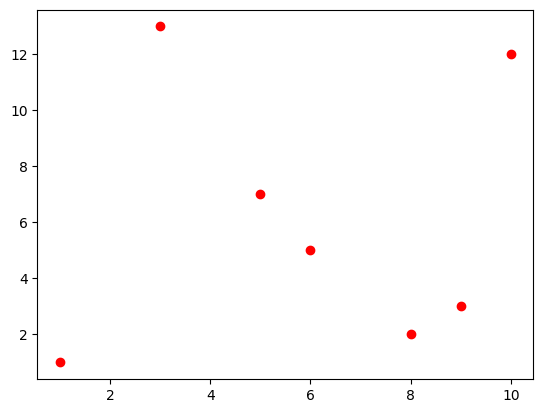

In [160]:
x,y=[9.0,8,1,6,10,5,3],[3.0,2,1,5,12,7,13]

import matplotlib.pyplot as plt
plt.plot(x,y,'o',color='red')
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [161]:
import numpy as np

n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

A

array([[ 3.00000000e+00,  1.00000000e+00,  1.07142857e-01,
         1.45238095e-01,  7.18253968e-02,  1.32936508e-02,
        -9.92063492e-05],
       [ 2.00000000e+00,  1.42857143e-01, -3.28571429e-01,
         2.17063492e-01,  1.86507937e-02,  1.38888889e-02,
         0.00000000e+00],
       [ 1.00000000e+00,  8.00000000e-01,  1.05555556e-01,
         1.61111111e-01, -5.07936508e-02,  0.00000000e+00,
         0.00000000e+00],
       [ 5.00000000e+00,  1.75000000e+00,  7.50000000e-01,
         5.95238095e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.20000000e+01,  1.00000000e+00,  5.71428571e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.00000000e+00, -3.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.30000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0000000

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$, <font color=blue> excuindo os dois últimos pontos $(x_i,y_i)$.

In [162]:
n=n-2

def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

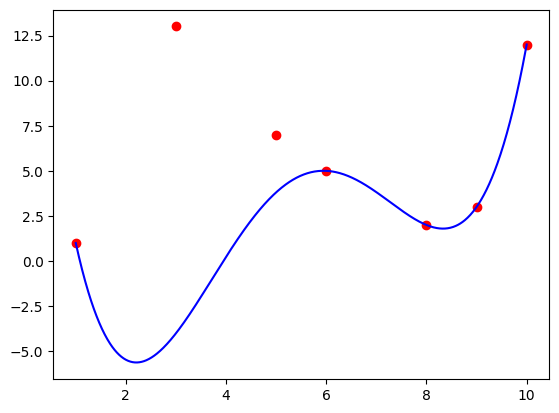

In [163]:
xx=np.linspace(1,10,1000)
yy=[poli(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue')
plt.show()

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$, <font color=blue> com todos os pontos $(x_i,y_i)$.

In [164]:
n=len(x)

def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

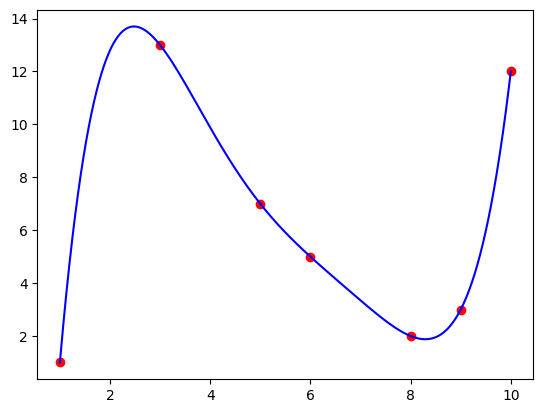

In [165]:
xx=np.linspace(1,10,1000)
yy=[poli(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue')
plt.show()

#**Exemplo 2:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_i=\frac{b-a}{2}\cos\left(\frac{\pi(2k-1)}{2n}\right),\qquad a=-5,\qquad b=5,$$ são inspirados nos [nós de Tchebychev](https://pt.wikipedia.org/wiki/Polin%C3%B4mios_de_Tchebychev), para $i=0,\,1,\,\ldots,\,n=25$.

In [166]:
n=25
a=-5
b=5

x=[]

for k in range(1,n+1): # Nós de Chebyshev reescalados.
  x.append((b-a)*np.cos(np.pi*(2*k-1)/(2*n))/2)

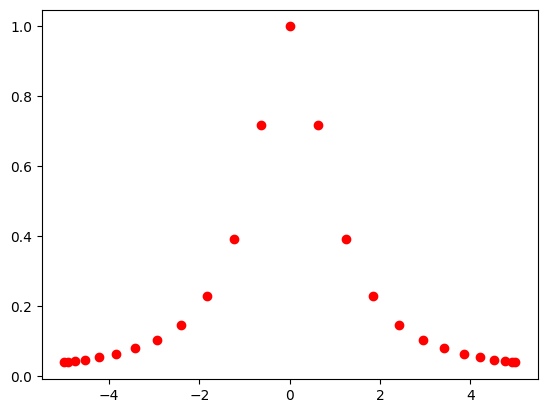

In [167]:
def f(s):
  return 1/(1+s**2)

y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [168]:
import numpy as np

n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$.

In [169]:
def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

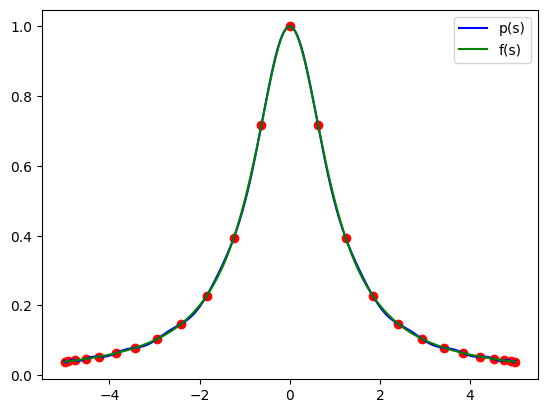

In [170]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()

**Obs:** A função desse exemplo e os pontos $x_i$ foram escolhidos para tratar do problema chamado de [efeito de Runge](https://pt.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge#:~:text=Em%20matem%C3%A1tica%2C%20em%20particular%20no%20campo%20espec%C3%ADfico%20da,interpola%C3%A7%C3%A3o%20polinomial%20para%20aproximar%20certas%20fun%C3%A7%C3%B5es.%20%5B%201%5D), que deveria ocorrer, caso tomássemos $x_i$ igualmente espaçados. Veja o exemplo a seguir.

#**Exemplo 3:**

Considere $$f(s)=\frac{1}{1+s^2},$$ e encontre o polinômio $p(s)$, que interpole $f(x_i)=y_i$, em que $$x_{i+1}=x_i+h,\qquad h=\frac{b-a}{n},\qquad a=-5,\qquad b=5,$$ para $i=0,\,1,\,\ldots,\,n-1$, com $n=25$.

In [171]:
n=11
a=-5
b=5

x=np.linspace(a,b,n)

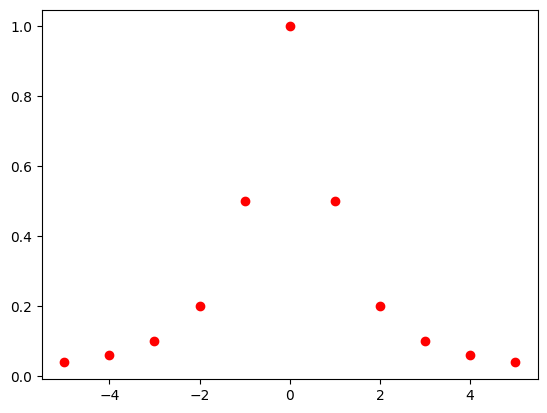

In [172]:
y=[f(s) for s in x]

n=len(x)

plt.plot(x,y,'o',color="red")
plt.show()

Vamos calcular os termos $f[x_0,x_1,\ldots,x_{j}]$.

In [173]:
n=len(x)

A = 0*np.empty([n,n])

#-------------- Diferenças divididas
for i in range(0,n):
  A[i][0]=y[i]

for j in range(1,n):
  for i in range(0,n-j):
    A[i][j]=(A[i][j-1]-A[i+1][j-1])/(x[i]-x[i+j])

Definindo os polinômios $N_{j}(s)$ e $p_n(s)$.

In [174]:
def N(i,s):
  p=1
  for j in range(0,i+1):
    p=p*(s-x[j])
  return p

def poli(s):
  q=A[0][0]
  for i in range(1,n):
    q=q+A[0][i]*N(i-1,s)
  return q

Vejamos se o polinômio é um bom ajuste para os dados:

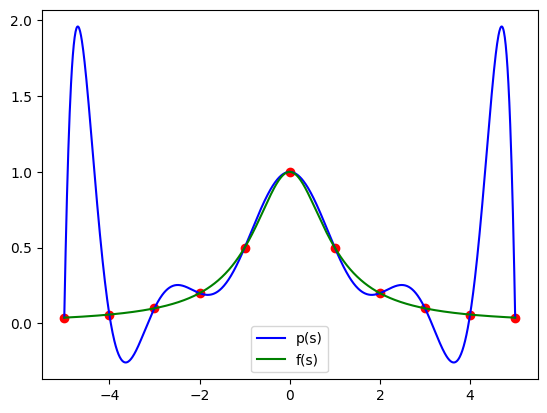

In [175]:
xx=np.linspace(-5,5,1000)
yy=[poli(s) for s in xx]
fy=[f(s) for s in xx]

plt.plot(x,y,'o', color='red')
plt.plot(xx,yy,color='blue',label='p(s)')
plt.plot(xx,fy,color='green',label='f(s)')
plt.legend()
plt.show()